In [1]:
from gensim.models.word2vec import Word2Vec
import ast
import pandas as pd

import logging

import requests
from bs4 import BeautifulSoup
import time
import urllib.request #
from selenium.webdriver import Chrome
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import pandas as pd
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

In [ ]:
# https://hyrama.com/?p=456
# pip install gensim

In [2]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('뷰티리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list

All_file = []
for name in name_list:
# 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/token_result.csv')
    All_file.append(df)
    
    dataCombine = pd.concat(All_file,axis =0, ignore_index = True)

    dataCombine.to_csv('testword.csv', index = False)
    


OSError: Initializing from file failed

In [6]:
project=pd.read_csv('testword.csv')
project

,comment,token
0,0:10 서티는 30,['티']
1,아냐 안찾았어 다시 들어가 내눈썩어,"['다시', '눈']"
2,아 내누 아내눈아내눈,"['누', '아내', '눈', '눈']"
3,13에서 포트 싹다 없앤다는 말이 계속 들려서 불안,"['포트', '싹', '말', '계속', '불안']"
4,네이비블루 되게 고급스럽고 이쁜거같아용,"['네이비', '블루']"
...,...,...
28993,이건 가져야겠당,['이건']
28994,이쯤되면 이숲님 별자리가 천칭좌가 아닐까 하는 궁금증이,"['이쯤', '숲', '별자리', '천칭', '좌', '궁금증']"
28995,완충된 상태에서 음악을 들었을 때 사용시간이 얼마나 되나요,"['완충', '상태', '음악', '때', '사용', '시간', '얼마나']"
28996,괜찮다 나는 TH909가 있다 가격도 알아보고 사는 곳도 알아보는데 절대 안 살거다,"['나', '가격', '곳도', '절대', '안']"


In [49]:

vec = []
vec2 = []
for i in range(len(project)):
   
    tm_ls = project['token'].iloc[i]
#     print(tm_ls)
    print(len(tm_ls))
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
                print(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

5
11
21
28
13
5
10
24
5
127
36
5
16
48
38
29
63
2
77
6
13
31
2
30
6
6
6
7
157
19
23
13
5
11
25
5
41
18
6
58
89
5
44
81
49
49
2
12
12
64
5
6
140
63
30
35
28
29
17
35
75
5
17
24
49
29
35
12
18
5
2
112
12
47
5
23
44
24
6
24
5
64
21
13
410
6
14
2
18
6
85
28
2
12
33
12
6
12
5
22
23
39
20
191
46
6
60
108
36
5
209
29
84
17
41
35
12
18
18
23
5
98
16
29
18
67
36
48
6
42
17
10
6
19
48
46
5
19
129
36
16
18
17
5
12
99
46
8
12
67
30
59
147
13
6
26
42
5
5
20
55
50
18
13
81
56
24
12
12
28
23
16
56
13
75
87
68
52
5
6
5
103
117
52
6
23
12
44
105
24
108
22
16
29
16
7
30
5
27
105
41
7
5
32
18
39
108
17
11
19
23
5
34
11
31
6
40
16
13
12
27
28
88
18
17
21
5
7
57
6
58
2
63
53
18
24
30
46
45
25
2
18
16
71
102
11
43
34
6
29
7
11
85
5
30
52
23
41
23
89
27
6
2
24
22
18
2
23
16
13
24
58
13
35
2
43
7
17
12
24
6
6
17
178
12
21
12
45
5
25
2
34
2
18
6
66
23
99
41
95
17
43
28
35
51
93
103
38
104
86
84
67
42
33
68
2
142
100
74
68
25
27
75
41
51
114
23
24
36
50
7
76
18
43
20
18
24
35
30
80
25
57
47
82
18
39
7
17
45
50


24
17
28
52
25
43
13
21
6
5
19
2
11
64
19
7
10
23
57
23
25
17
17
283
15
17
12
43
125
49
34
24
82
54
107
44
7
17
18
12
47
54
17
72
2
12
18
5
43
2
18
56
238
18
2
2
12
2
5
394
216
16
62
19
30
41
48
102
22
42
35
10
49
90
10
64
6
6
49
12
19
47
18
18
29
62
23
47
6
64
11
6
59
28
12
2
11
24
22
37
20
17
17
7
36
34
5
37
18
12
5
25
12
46
47
50
49
18
32
12
17
2
17
25
12
19
2
124
11
52
29
50
44
19
24
12
26
11
11
12
12
43
10
17
30
13
17
13
18
13
13
32
2
36
7
12
36
115
29
12
48
29
28
12
5
54
24
30
6
30
70
29
11
111
12
31
38
80
19
6
63
11
12
12
37
63
29
2
56
56
48
37
7
13
37
6
12
19
7
29
71
47
17
31
5
2
68
66
53
6
93
30
12
10
13
34
39
13
62
53
130
49
165
51
73
60
47
54
73
38
51
188
166
45
5
77
67
30
56
11
72
60
75
29
5
86
60
92
109
64
53
19
43
113
26
30
140
35
12
40
18
66
70
104
37
29
64
31
101
41
85
18
24
48
344
11
43
107
24
30
16
53
36
229
19
78
76
28
233
66
64
56
81
203
117
52
19
13
153
12
64
58
57
64
18
66
31
12
88
16
51
62
25
45
42
38
17
38
201
20
25
37
19
762
37
50
19
86
74
24
6
59
47
169
11
24


6
52
26
14
12
24
23
20
23
18
6
23
6
2
38
2
29
6
27
89
29
46
29
34
17
33
46
29
35
2
113
11
56
40
30
2
16
24
52
22
15
30
5
6
18
16
30
21
11
81
39
21
6
24
11
23
17
19
24
8
7
2
22
36
12
2
6
2
2
17
5
31
6
47
6
11
6
33
5
18
24
37
33
6
39
9
5
30
21
18
68
11
7
17
6
29
34
77
11
41
12
2
18
16
41
24
15
24
31
25
37
11
18
12
23
18
6
35
11
7
12
26
21
18
19
44
11
5
17
30
10
8
12
40
39
24
33
84
23
6
12
76
64
39
6
42
12
31
17
12
22
6
6
18
54
11
17
20
6
22
37
43
23
160
26
10
12
24
109
17
2
7
21
18
41
17
6
11
5
53
41
22
10
40
148
27
173
106
24
53
177
42
47
62
53
56
11
94
60
2
18
15
10
80
43
21
26
34
53
7
2
40
17
105
54
49
22
100
23
35
38
54
59
18
16
2
29
34
54
6
6
47
19
24
11
74
71
6
33
18
16
28
20
34
24
12
60
17
110
45
12
12
32
274
12
16
100
24
6
35
10
25
11
53
96
22
36
2
24
12
33
6
10
28
6
2
2
5
16
35
17
79
46
7
75
11
22
11
31
24
12
11
6
6
81
36
51
26
17
23
12
29
2
30
23
24
34
16
21
24
35
46
24
50
2
56
42
12
22
48
2
23
11
75
11
28
76
123
11
16
16
13
36
25
2
28
2
29
78
16
31
21
24
58
13
171
2
44
42
12
1

65
28
6
45
12
19
37
43
11
26
119
32
18
10
11
21
40
56
41
6
6
17
5
23
6
32
17
26
46
12
6
87
24
25
58
29
18
25
17
22
30
112
24
18
58
2
47
5
159
2
2
372
19
72
51
65
7
6
11
115
6
62
20
2
12
12
11
24
28
17
11
18
17
23
10
24
126
12
18
69
2
35
5
13
22
35
17
2
2
33
64
63
50
103
69
28
135
38
66
50
109
47
25
11
18
12
11
11
12
32
34
24
22
6
24
93
23
6
18
17
11
16
11
48
6
72
23
6
40
6
28
24
13
131
45
123
2
64
118
68
212
107
18
67
46
16
66
37
36
35
22
7
18
35
77
17
68
39
7
46
29
18
68
6
13
6
17
2
48
11
5
29
71
59
17
693
22
17
76
24
16
26
13
15
25
25
37
49
82
21
18
26
35
64
21
6
127
47
123
6
12
42
13
27
51
6
29
17
37
23
14
31
22
12
115
26
24
58
69
13
38
12
79
18
5
2
2
64
12
42
79
5
92
40
23
6
45
24
35
15
36
35
2
12
40
86
11
52
41
12
19
11
7
12
2
2
11
6
34
52
6
6
12
35
6
23
46
22
10
56
33
2
30
50
67
12
6
79
44
28
2
2
2
14
11
29
2
87
19
2
114
2
72
2
25
57
45
240
2
53
12
2
23
26
34
11
41
61
23
47
29
5
28
49
28
11
35
12
18
12
11
37
36
5
22
87
10
13
12
29
34
66
43
25
49
18
29
77
28
33
26
51
35
86
18
5
21

112
18
44
34
40
59
55
44
39
60
110
54
32
96
106
50
44
88
42
97
96
39
60
154
46
73
98
44
125
64
139
160
134
26
39
39
10
46
38
16
87
39
23
91
108
11
164
91
62
24
270
33
6
46
75
15
25
12
18
36
107
7
38
16
29
107
62
50
24
72
26
24
12
58
55
55
83
24
99
56
103
22
67
2
24
136
48
15
13
240
76
57
35
73
41
50
18
6
25
29
35
29
114
61
49
100
103
76
88
84
52
25
34
57
36
26
36
50
56
59
54
81
85
32
95
78
71
71
22
86
89
19
45
31
67
72
91
83
103
5
81
94
154
117
50
57
62
50
38
146
84
934
113
351
300
191
219
215
214
369
12
12
11
108
11
77
18
23
25
24
30
90
31
19
11
23
46
12
35
51
31
26
31
78
57
69
42
62
36
30
34
67
72
82
18
25
48
43
81
59
52
131
28
34
52
151
51
100
59
59
91
35
16
59
17
83
16
6
19
64
23
34
27
48
18
5
17
5
94
11
57
76
40
6
74
28
11
84
56
19
18
43
2
28
16
18
41
17
11
126
11
24
152
23
17
23
112
22
16
50
35
6
42
18
2
90
15
218
9
80
112
25
30
56
47
10
12
12
96
2
19
27
35
23
34
28
192
24
2
30
35
33
45
52
15
147
2
26
45
2
11
5
6
43
243
149
82
50
18
2
39
23
2
12
52
375
130
592
342
68
151
91
64
27

17
53
249
64
68
77
30
29
49
17
31
51
42
24
51
68
28
29
11
22
49
19
41
16
6
16
19
40
52
17
19
52
18
6
27
16
23
35
43
30
6
29
32
31
11
35
17
18
40
123
23
24
50
2
20
24
20
18
24
19
28
48
2
11
43
17
19
17
2
2
16
19
17
23
38
24
24
36
12
18
11
12
7
14
72
7
28
26
9
11
53
34
18
59
23
30
11
11
12
6
6
17
59
38
25
41
23
6
23
37
32
27
20
71
12
19
19
31
54
49
13
30
12
34
12
40
30
11
22
17
19
46
47
16
17
6
11
29
36
25
36
17
23
18
2
29
11
34
26
16
12
11
15
72
6
22
31
5
33
46
10
23
24
24
34
37
24
17
19
135
8
77
13
12
10
30
146
13
57
13
12
12
13
13
37
45
15
23
29
12
12
12
22
57
8
6
33
30
24
18
2
26
31
13
12
11
28
17
19
74
24
33
13
18
12
99
2
23
23
6
34
17
13
18
14
77
29
6
42
37
47
5
73
41
37
8
23
34
24
99
11
54
23
121
30
29
12
37
7
31
19
30
2
18
2
39
12
11
27
63
8
7
37
2
124
24
46
23
26
19
54
30
30
16
39
7
31
19
6
23
34
16
33
32
34
13
82
30
46
39
28
24
12
29
117
18
23
13
5
30
7
59
14
48
10
29
30
70
44
35
22
55
32
6
29
73
2
18
17
19
30
20
58
56
19
23
12
11
31
2
18
12
11
24
29
25
52
78
47
6
29
12
12
7
17

41
17
42
42
29
56
35
6
6
28
24
23
71
12
46
40
168
18
30
31
11
5
62
40
6
18
46
29
34
2
18
31
5
23
18
109
24
11
29
51
18
18
24
18
49
43
52
18
96
64
6
225
35
10
197
2
2
16
22
6
68
7
2
78
18
66
6
47
53
6
12
12
5
28
30
7
65
76
146
34
29
83
76
11
83
36
6
73
316
90
75
30
35
11
31
22
6
46
37
6
29
80
18
17
6
23
13
19
35
12
23
43
18
14
44
39
37
11
36
47
6
29
21
129
12
24
80
6
39
12
19
25
27
89
16
19
21
111
98
56
64
37
217
192
2
19
14
348
216
18
23
2
48
11
18
129
93
35
58
133
41
142
42
61
48
37
119
100
12
10
17
34
98
21
377
6
74
41
302
186
2
42
92
47
23
193
48
443
23
38
172
31
26
12
5
49
6
34
41
12
6
30
6
70
18
2
18
35
43
41
2
11
11
38
2
6
22
11
11
98
20
99
11
24
2
2
22
46
2
2
27
149
12
2
5
17
6
2
43
2
12
2
16
12
45
10
55
10
22
192
120
19
71
35
6
6
2
74
17
87
39
88
17
47
5
63
6
42
88
27
36
28
35
78
47
12
31
95
18
61
135
42
26
37
58
113
37
96
30
143
19
17
62
37
55
132
40
49
77
5
94
14
32
33
244
46
6
89
16
29
54
24
73
75
29
27
5
79
19
49
39
6
81
41
44
69
42
486
11
22
42
59
37
23
47
12
6
23
75
6
12


18
49
84
5
15
6
8
36
30
44
68
30
19
11
60
28
7
12
40
16
19
48
37
48
17
18
11
38
12
32
31
21
90
6
44
54
12
58
62
28
65
46
9
19
17
11
15
12
6
18
14
35
6
17
17
6
16
31
15
18
22
2
6
2
12
29
19
38
6
19
13
6
13
23
10
24
39
17
6
7
49
29
8
50
7
34
58
30
8
45
10
17
12
21
2
29
91
12
51
63
7
6
23
41
95
7
23
40
35
16
33
27
24
39
101
10
62
59
11
11
16
21
34
12
29
25
5
26
31
10
12
18
15
17
29
36
19
31
119
41
24
40
13
258
36
24
6
6
6
36
32
66
20
22
19
23
22
11
6
30
36
95
19
18
17
32
49
28
30
29
13
17
18
13
13
23
5
25
22
19
53
19
38
18
49
8
33
17
23
64
37
46
23
65
6
62
24
11
53
80
22
85
26
101
15
24
47
18
49
6
191
12
24
39
34
6
23
13
25
11
6
15
39
12
32
29
49
24
17
13
2
43
50
13
29
23
30
18
106
81
6
6
6
18
55
32
6
6
29
6
35
38
36
37
6
61
65
11
71
24
15
22
5
14
11
12
18
40
31
2
2
34
61
18
5
13
17
36
13
6
31
45
6
71
12
19
56
41
60
12
460
12
7
6
17
12
117
18
18
17
17
91
2
254
50
23
45
21
24
17
12
5
21
6
6
6
11
18
13
46
11
23
29
116
33
24
18
2
12
10
65
23
40
6
5
2
22
18
15
11
81
13
88
26
18
22
2
23
23
5
1

37
28
29
47
57
73
24
6
2
12
12
139
34
12
82
49
24
45
37
13
31
24
25
46
2
18
27
12
26
6
29
32
29
110
79
19
35
57
23
36
11
2
23
12
46
121
44
46
194
11
349
5
52
29
31
13
17
98
23
12
6
65
46
18
2
47
28
22
72
18
46
2
23
91
44
20
6
2
6
27
101
25
79
12
62
70
274
48
13
57
29
77
2
17
17
11
18
115
19
57
24
12
24
57
30
60
18
6
120
7
28
20
26
63
59
52
18
44
19
16
23
28
29
19
73
6
2
33
12
28
8
40
30
36
66
58
12
22
64
15
24
13
5
17
10
35
12
72
18
67
28
33
30
23
30
63
28
5
20
67
37
84
104
6
7
17
21
124
106
48
131
28
18
34
218
40
138
40
44
250
68
93
91
65
248
134
17
100
7
56
2
18
17
11
24
17
6
40
30
45
47
17
24
97
48
31
36
31
70
23
58
18
11
34
23
61
46
23
2
18
115
41
12
42
29
16
16
30
14
2
29
134
163
59
48
2
131
35
10
11
75
47
26
24
95
90
743
33
24
40
19
104
13
12
28
18
36
23
23
23
67
103
43
7
30
20
36
60
215
35
15
82
18
29
24
5
12
17
18
36
18
24
35
2
35
74
17
2
5
41
65
6
40
17
101
150
42
6
16
16
51
93
2
28
6
11
13
75
29
116
23
32
34
36
22
64
2
2
114
2
60
17
51
6
32
22
12
33
22
6
18
63
152
12
52
36
46

In [60]:
tm_ls = project['token'].iloc[0]
tm_ls.split("'")[1]

'티'

In [19]:
len(project)

28998

In [61]:

vec3 =[]
for i in range(len(project['token'])):
    tm_ls=project['token'].iloc[i]
    for j in range(len(tm_ls)):
        j=+1
        vec3.append(tm_ls.split("'")[j])
        print(vec3)
        j=+2


['티']
['티', '티']
['티', '티', '티']
['티', '티', '티', '티']
['티', '티', '티', '티', '티']
['티', '티', '티', '티', '티', '다시']
['티', '티', '티', '티', '티', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '누']
['티', '티', '티', '티', '티', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '다시', '누', '누']
['티', '티', '티', '티', '티', '다시', '다시', '

IndexError: list index out of range

In [62]:

import requests
from bs4 import BeautifulSoup
import time
import urllib.request #
from selenium.webdriver import Chrome
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import pandas as pd
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

In [86]:
df = pd.read_csv('뷰티리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list

All_file = []
for name in name_list:
# 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/result.csv')
    All_file.append(df)
    
    dataCombine = pd.concat(All_file,axis =0, ignore_index = True)

    dataCombine.to_csv('testword_notoken.csv', index = False)
    

In [3]:
comment_data = pd.read_csv('testword_notoken.csv')
comment_data

,Unnamed: 0,youtube_id,comment,like_num
0,0,노을빛창가,0:10 서티는 30,2개
1,1,아름다운갤워치액티브,아냐 안찾았어 다시 들어가 내눈썩어,2개
2,2,웰시코기,아 내누 아..내눈..아ㅏㅏㅏㅏㅏㅏ내눈!,1개
3,3,월리,13에서 포트 싹다 없앤다는 말이 계속 들려서 불안....,1개
4,4,이정호,네이비블루 되게 고급스럽고 이쁜거같아용,1개
5,5,물똥,12...11월달 말이되냐...이건아니지~!~!!!,1개
6,6,송회장,개같솔,1개
7,7,배형천,12미니 뒤판은 유리로나오는건가요?,2개
8,8,jang2014,1빠,1개
9,9,조현성,네이비블루 은은하게 고급스러운데 듣기로는 네이비블루에 약간의 보라빛이 감돌아 상당히...,0개


In [4]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [5]:
comment_list = []
for i in range(len(comment_data)):
    comment_list.append(comment_data['comment'].iloc[i])

In [6]:
comment_result = []

for i in comment_list:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

In [7]:
def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i) #명사인 단어만 추출
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

D:\anaconda31\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [92]:
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

In [8]:
comment_result.head()

,comment,token
0,0:10 서티는 30,[티]
1,아냐 안찾았어 다시 들어가 내눈썩어,"[다시, 눈]"
2,아 내누 아내눈아내눈,"[누, 아내, 눈, 눈]"
3,13에서 포트 싹다 없앤다는 말이 계속 들려서 불안,"[포트, 싹, 말, 계속, 불안]"
4,네이비블루 되게 고급스럽고 이쁜거같아용,"[네이비, 블루]"


In [9]:
vec = []
for i in range(len(comment_result)):
    vec2 = []
    tm_ls = comment_result['token'].iloc[i]
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

In [10]:
vec

[['다시'],
 ['아내'],
 ['포트', '계속', '불안'],
 ['네이비', '블루'],
 ['미니', '뒤판', '유리', '가요'],
 ['네이비',
  '블루',
  '듣기',
  '네이비',
  '블루',
  '약간',
  '보라',
  '색상',
  '네이비',
  '블루',
  '약간',
  '보라',
  '존예',
  '어쨋',
  '무조건',
  '네이비',
  '블루'],
 ['노말', '모델', '삼성', '모델', '모델', '삼성'],
 ['제발'],
 ['아이폰', '탑재', '애플', '검수', '통과', '탑재', '걱정'],
 ['이렁', '차이', '건가'],
 ['한국', '디스', '애플', '인정'],
 ['애플', '워치', '에어팟', '얼굴', '달라', '애플', '글래스', '앱등이', '영역', '얼굴'],
 ['애플', '글래스', '구글', '글래스', '일반', '소비자', '어필', '소비자', '진짜', '스마트', '안경', '정의'],
 ['처음'],
 ['타이밍', '깜짝'],
 ['배터리', '로고', '사과', '모양', '차이'],
 ['오늘', '에어', '사서', '영상', '금보'],
 ['미니'],
 ['미니'],
 ['미니'],
 ['모바일'],
 ['사진',
  '보고',
  '아이폰',
  '아이폰',
  '거의',
  '다만',
  '아이폰',
  '아이폰',
  '프로세서',
  '아이폰',
  '프로세서',
  '프로세서',
  '하나',
  '소프트',
  '웨어',
  '측면',
  '카메라',
  '보정',
  '기능'],
 ['아이폰', '컬러', '진짜'],
 ['기준', '작고', '배젤'],
 ['케이티', '개통'],
 ['니지'],
 ['아이폰', '중고', '판매', '언제'],
 ['동준', '영상', '도움', '폴드', '고려', '보고'],
 ['삼성', '플립', '휴대'],
 ['이유'],
 ['외부', '액정', '플립', '수준', '거

## word2vec
- 중심단어와 주변단어 벡터의 내적이 코사인 유사도가 되도록 단어를 벡터
    공간에 임베딩(배치) 한다.

- min_count  = 몇 이하로 등장하는 단어 제외
- workers = 몇코어 쓸건지
- iter = 몇번 학습하라는건지
- window =  주변의 단어를 몇개로 볼것인지 
- size = 몇차원으로 할것인지 
- 학습 차원의 크기
일반적으로 100-300을 사용한다. 최소한의 정확도를 얻기 위해서는 50차원 이상은 사용해야한다고 생각한다. 만약 적은 차원을 선택하면 많은 차원에서 얻을 수 있는 특성들을 잃게될 수 있다. 훈련시간이 크게 중요하지 않다면 200차원을 권한다. 최상의 정확도는 300차원에서 얻어진다. 300차원 이상이면 학습시간이 늘어나는 것에 비해서 얻어지는 향상은 미미하다.

In [108]:
model.most_similar('삼성')

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('글래스', 0.6728548407554626),
 ('거릅니', 0.6462670564651489),
 ('행보', 0.6448495388031006),
 ('마크', 0.6441312432289124),
 ('강점', 0.6431161165237427),
 ('엘쥐', 0.643061637878418),
 ('사의', 0.6375511884689331),
 ('납품', 0.6334213018417358),
 ('인수', 0.6333851218223572),
 ('고문', 0.6305969953536987)]

In [85]:
model = Word2Vec(vec, min_count=5,window=3,iter=20, size=200, sg=1) #skip-gram

In [109]:
model.most_similar('스펙')

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('시트', 0.7170760035514832),
 ('이상은', 0.7033041715621948),
 ('마진', 0.6872141361236572),
 ('어쨌든', 0.6849695444107056),
 ('안감', 0.6845746040344238),
 ('성은', 0.6837736368179321),
 ('유물', 0.6765546798706055),
 ('스팩', 0.6765018701553345),
 ('승부', 0.6752917766571045),
 ('싱글코어', 0.6737093329429626)]

In [110]:
model.most_similar(positive = ["엘지","강점"])[:15]

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('가전', 0.8540619611740112),
 ('부서', 0.8403780460357666),
 ('거릅니', 0.8361591696739197),
 ('행보', 0.8207190632820129),
 ('언빡싱', 0.8130220174789429),
 ('쿼드', 0.8092571496963501),
 ('라이벌', 0.8008276224136353),
 ('고문', 0.7957784533500671),
 ('착각', 0.7938002347946167),
 ('엘쥐', 0.7918614149093628)]

In [75]:
model.similarity('아이폰', '디자인')

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.34325597

In [86]:
model.wv.syn0.shape 

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


(3480, 200)

In [87]:
model.wv.syn0.shape #w2v size  -> 45개의 단어가 100차원을 가지고 있음

#45개의 단어가 100차원으로 벡터화된 수치를 넣어줌
word_vectors = model.wv.syn0 # model.wv.vectors와 같은 값을 가짐

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.
D:\anaconda31\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.


In [88]:
word_vectors

array([[ 0.04442827, -0.11605753,  0.03077762, ..., -0.1503762 ,
        -0.31005093, -0.08573914],
       [-0.1371412 , -0.38027748,  0.05505154, ..., -0.01739655,
        -0.09641172,  0.17563593],
       [-0.2306588 , -0.11774433,  0.1934827 , ...,  0.20228526,
        -0.35975495, -0.12971185],
       ...,
       [-0.01976025,  0.0099951 ,  0.13660984, ...,  0.00532043,
        -0.149465  , -0.09236777],
       [ 0.06845085,  0.00183647,  0.11904361, ...,  0.02926968,
        -0.0621896 , -0.06537522],
       [-0.13828516,  0.00861365,  0.2004097 , ..., -0.05068435,
        -0.12107209, -0.20102851]], dtype=float32)

In [89]:
from sklearn.cluster import KMeans
num_clusters = 6 #cluster의 갯수 산정
kmeans_clustering = KMeans( n_clusters = num_clusters )#default

In [90]:
idx = kmeans_clustering.fit_predict( word_vectors ) #각 단어가 어떤 군집에 속하는지 확인

In [91]:
idx

array([5, 3, 5, ..., 1, 1, 1])

In [92]:

# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word #학습된 단어들 unique
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}#각 단어 별로 클러스터 번호에 매칭

In [93]:
print(names)

['영상', '진짜', '리뷰', '아이폰', '가격', '사용', '보고', '제품', '생각', '오늘', '정말', '애플', '인트', '성능', '그냥', '프로', '구매', '보드', '삼성', '정도', '사람', '디자인', '항상', '역시', '때문', '케이스', '세대', '벨벳', '이번', '노트북', '하나', '카메라', '갤럭시', '배터리', '게임', '지금', '기능', '정보', '비교', '이제', '인치', '요즘', '고민', '추천', '가성', '엘지', '혹시', '화면', '가요', '아이패드', '맥북', '인텔', '모델', '리안', '느낌', '차이', '한번', '노트', '다른', '바로', '산다', '처음', '소리', '출시', '문제', '댓글', '다시', '스피커', '구독', '계속', '지원', '다음', '오케이', '부분', '공기청정기', '설명', '충전', '다이슨', '가지', '컴퓨터', '마스크', '오버', '이어폰', '이유', '최고', '에어', '조금', '뭔가', '유튜브', '건가', '시간', '테스트', '이상', '성조', '무선', '이건', '대박', '업데이트', '존버', '작업', '민성', '형님', '기대', '완전', '구입', '누나', '라이', '인트로', '인식', '기본', '스마트폰', '거의', '경우', '독자', '언제', '광고', '모니터', '제발', '마음', '가장', '방구', '사고', '편집', '매력', '구석', '사랑', '제일', '에어팟', '별로', '핸드폰', '프레임', '회사', '예전', '코어', '얼마나', '두목', '얼마', '색상', '우리', '감사', '설정', '방법', '추가', '채널', '시리즈', '사서', '티비', '점점', '개인', '레드', '엠알님', '사양', '여기', '시작', '유저', '기기', '얼굴', '단점', '썸네일', '사실', '아주', 

In [94]:

for cluster in range(0,6):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))): #list(dict)키 값만 리스트로 반환
        #list(dict.values)는 value값이 리스트로 반환
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['사용', '배터리', '혹시', '화면', '가요', '한번', '소리', '문제', '지원', '부분', '충전', '마스크', '시간', '테스트', '무선', '업데이트', '인식', '경우', '설정', '방법', '추가', '티비', '기기', '단점', '촬영', '장점', '속도', '동영상', '모드', '마우스', '사운드', '버튼', '와이파이', '안드로이드', '충전기', '화질', '상태', '마이크', '쓰기', '터치', '일반', '엣지', '확인', '음질', '실제', '페이스', '연결', '음악', '크롬', '설치', '블루투스', '인터넷', '어플', '스마트', '통화', '케이블', '활용', '녹음', '포트', '액정', '해결', '기존', '구글', '이용', '최대', '고장', '아이디', '자동', '직접', '살짝', '가끔', '다만', '그대로', '커버', '패널', '아래', '필름', '개발', '가능', '단자', '공유', '박스', '대신', '대해', '공유기', '방식', '그게', '전원', '현상', '모바일', '전화', '초기', '거리', '보통', '데이터', '서비스', '통신사', '개선', '잘못', '무료', '이후', '관리', '만약', '상황', '고정', '아무', '보스', '조절', '다운', '출력', '보안', '플레이', '해당', '보조', '오른쪽', '키노트', '사이트', '번인', '전체', '재생', '베터리', '불량', '배경', '밝기', '지역', '비번', '제한', '해제', '넷플릭스', '조루', '노션', '심지어', '배경화면', '세로', '제거', '확장', '파일', '위로', '방진', '변경', '부팅', '노이즈', '유리', '외부', '제공', '작동', '카톡', '가정', '베이스', '요금', '기반', '수명', '빅스', '왼쪽', '동시', '정상', '유지', '패스', 

['디자인', '때문', '기능', '산다', '공기청정기', '다이슨', '우리', '기술', '위해', '코로나', '걱정', '브랜드', '쿠쿠', '쿠첸', '감성', '소비자', '발전', '공기', '엄마', '필터', '센서', '효과', '건강', '저런', '저희', '프린터', '드네', '부모님', '청소', '스튜디오', '바퀴', '게다가', '품질', '어머니', '솜사탕', '아웃', '가습기', '여름', '먼지', '냄새', '레이저', '가족', '에어컨', '시점', '바람', '동생', '선풍기', '위치', '하나로', '나노', '평소', '포인트', '표현', '바이러스', '공간', '유행', '청소기', '이기', '핵심', '만큼', '시국', '가치', '레트로', '라디오', '인테리어', '리모컨', '집안', '청정기', '능력', '편의', '압도', '간지', '작품', '가전제품', '명품', '차별', '심플', '기적', '피부', '신뢰', '미세먼지', '마다', '창문', '광안', '요소', '멀리', '어머님', '강아지', '흡입', '인물', '아버지', '올인원', '믿음', '오라', '사회', '포커', '효도', '고양이', '비염', '영국', '미로', '넘사벽', '조도', '물이', '행위', '중심', '심쿵', '수용', '생산자', '여동생', '플라이', '소품', '순환', '헤파', '환기', '적임', '기세', '소형', '습기', '복합', '값어치', '배신', '떄문', '미술', '청정', '모기향', '평형', '보온', '가스', '날개', '할아버지', '아기', '요안', '물질', '가열', '미디', '손잡이', '정화', '청기', '구연산']

Cluster 3
['진짜', '아이폰', '애플', '삼성', '케이스', '벨벳', '이번', '카메라', '갤럭시', '엘지', '모델', '느낌', '노트', '출시', '스피커', '존버

In [95]:
model_name = '200features_5minwords_3text'

In [96]:
model.save(model_name)

In [33]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

import seaborn as sns
import matplotlib.font_manager as fm


from PIL import Image

import nltk

font_name = fm.FontProperties(fname='C:/windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family =font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [97]:
mpl.rcParams['axes.unicode_minus'] = False

model_name = '100features_5minwords_3text'
model = g.Doc2Vec.load(model_name)

In [98]:
vocab = list(model.wv.vocab)
X = model[vocab]

D:\anaconda31\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [99]:
print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

3480
[ 0.60316646  0.29869783 -0.07997715  0.10960691  0.07762533 -0.130181
 -0.26913658  0.4331139   0.08294457 -0.2868581 ]


In [100]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

In [101]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [102]:
df.head(10)

,x,y
다시,-232.471725,56.906033
아내,-48.418308,-7.984440
포트,167.533203,-3.200396
계속,-196.703537,10.719916
네이비,25.940842,-47.388100
블루,57.064510,-60.999893
미니,-146.700378,-0.832804
유리,104.553612,50.116699
가요,-34.955658,-188.355545
듣기,-141.365829,87.826752


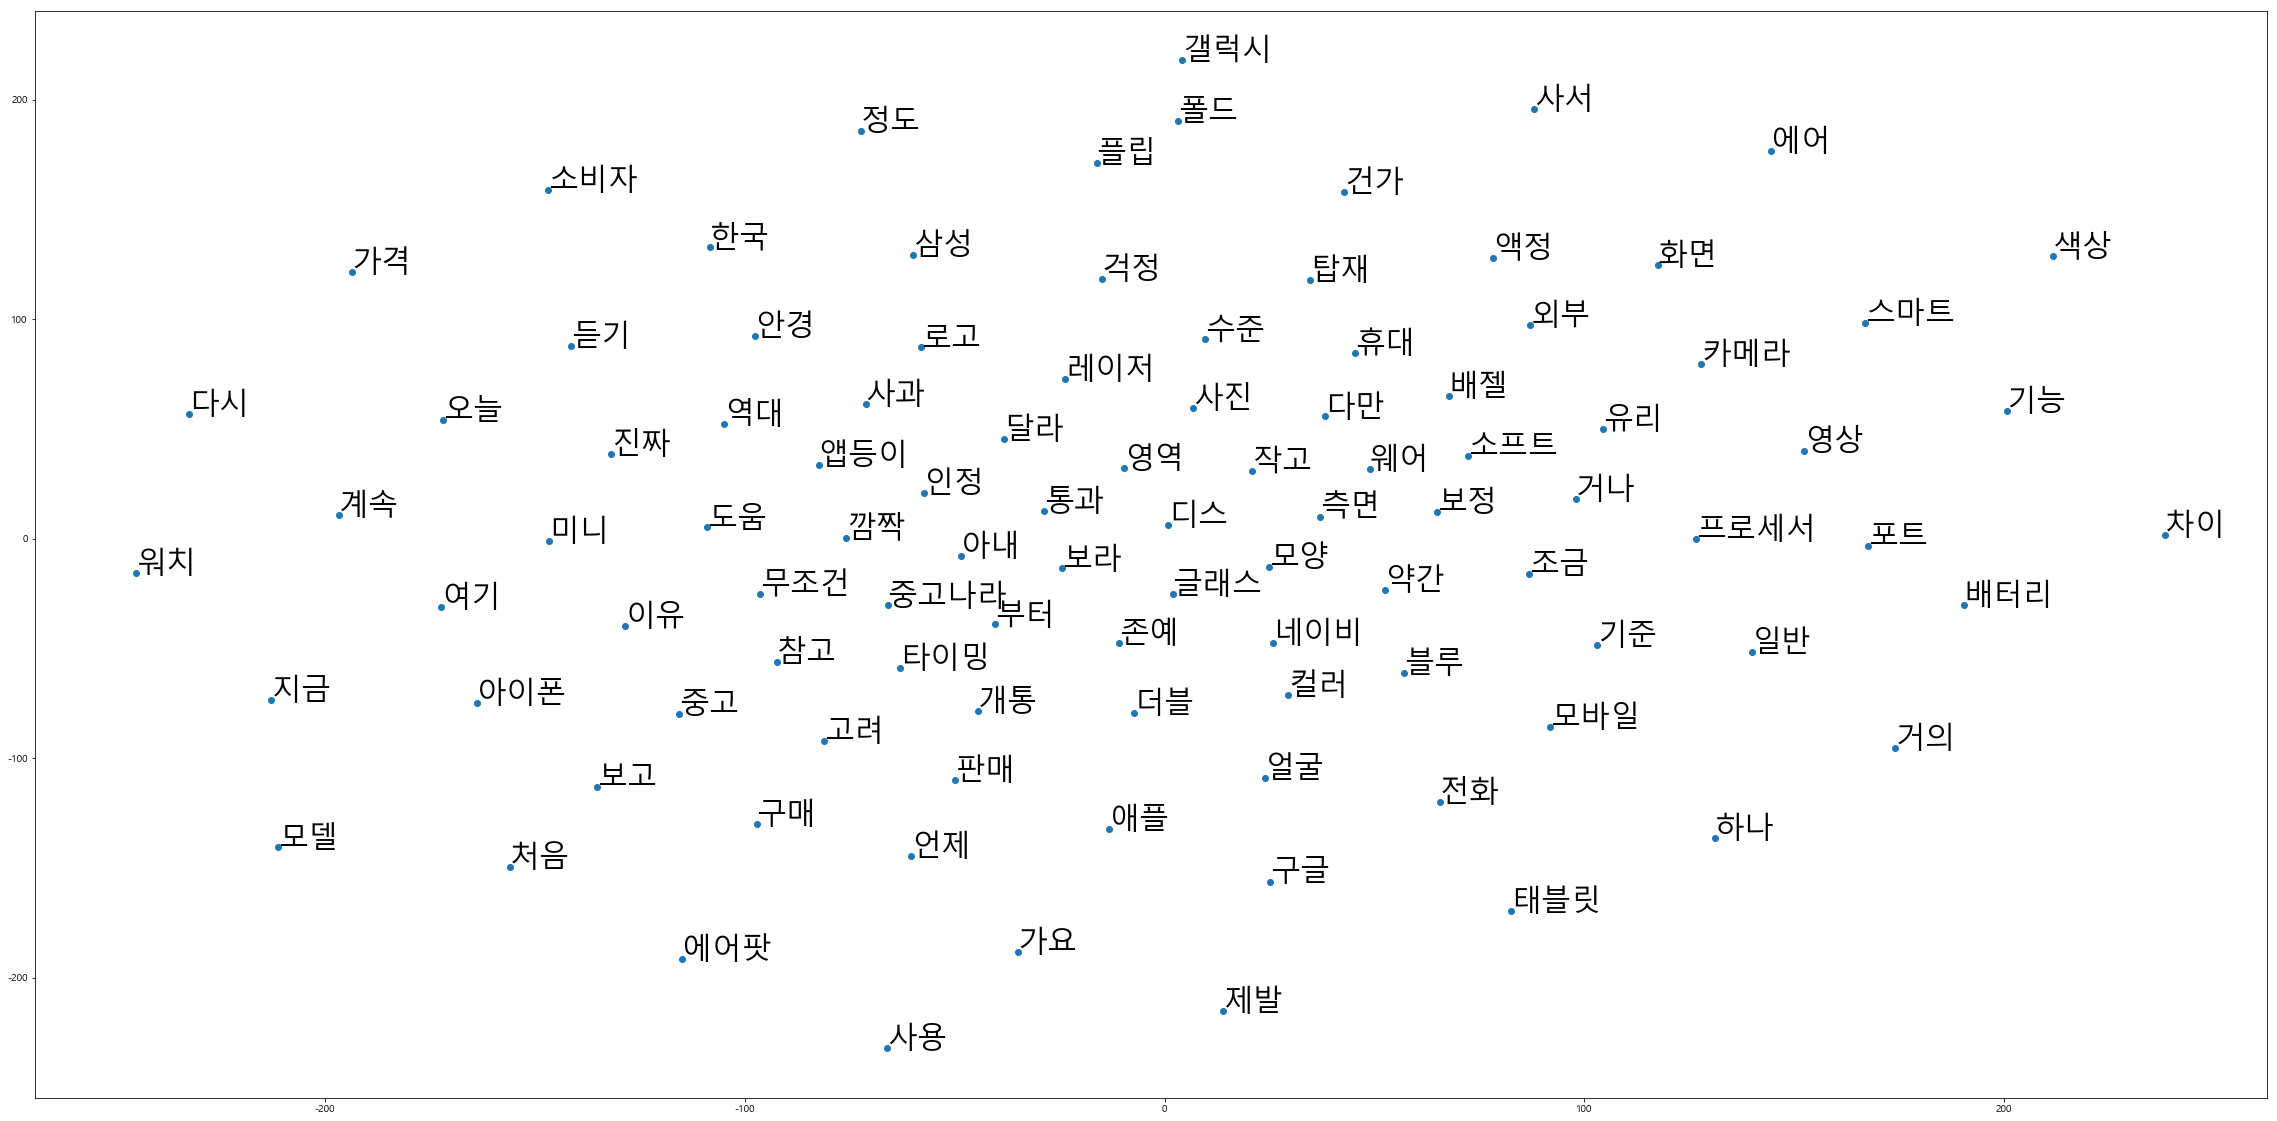

In [103]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [104]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])
# X_tsne = tsne.fit_transform(X)

In [105]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [106]:
df.head(10)

,x,y
다시,-1.833384,1.316707
아내,-2.927250,-2.011469
포트,-8.311830,-1.131907
계속,-2.944130,-0.730287
네이비,-3.343641,1.280188
블루,-3.520124,1.471812
미니,-5.577180,1.853448
유리,-4.751748,-0.370157
가요,-0.432624,-5.133992
듣기,-2.643975,0.133797


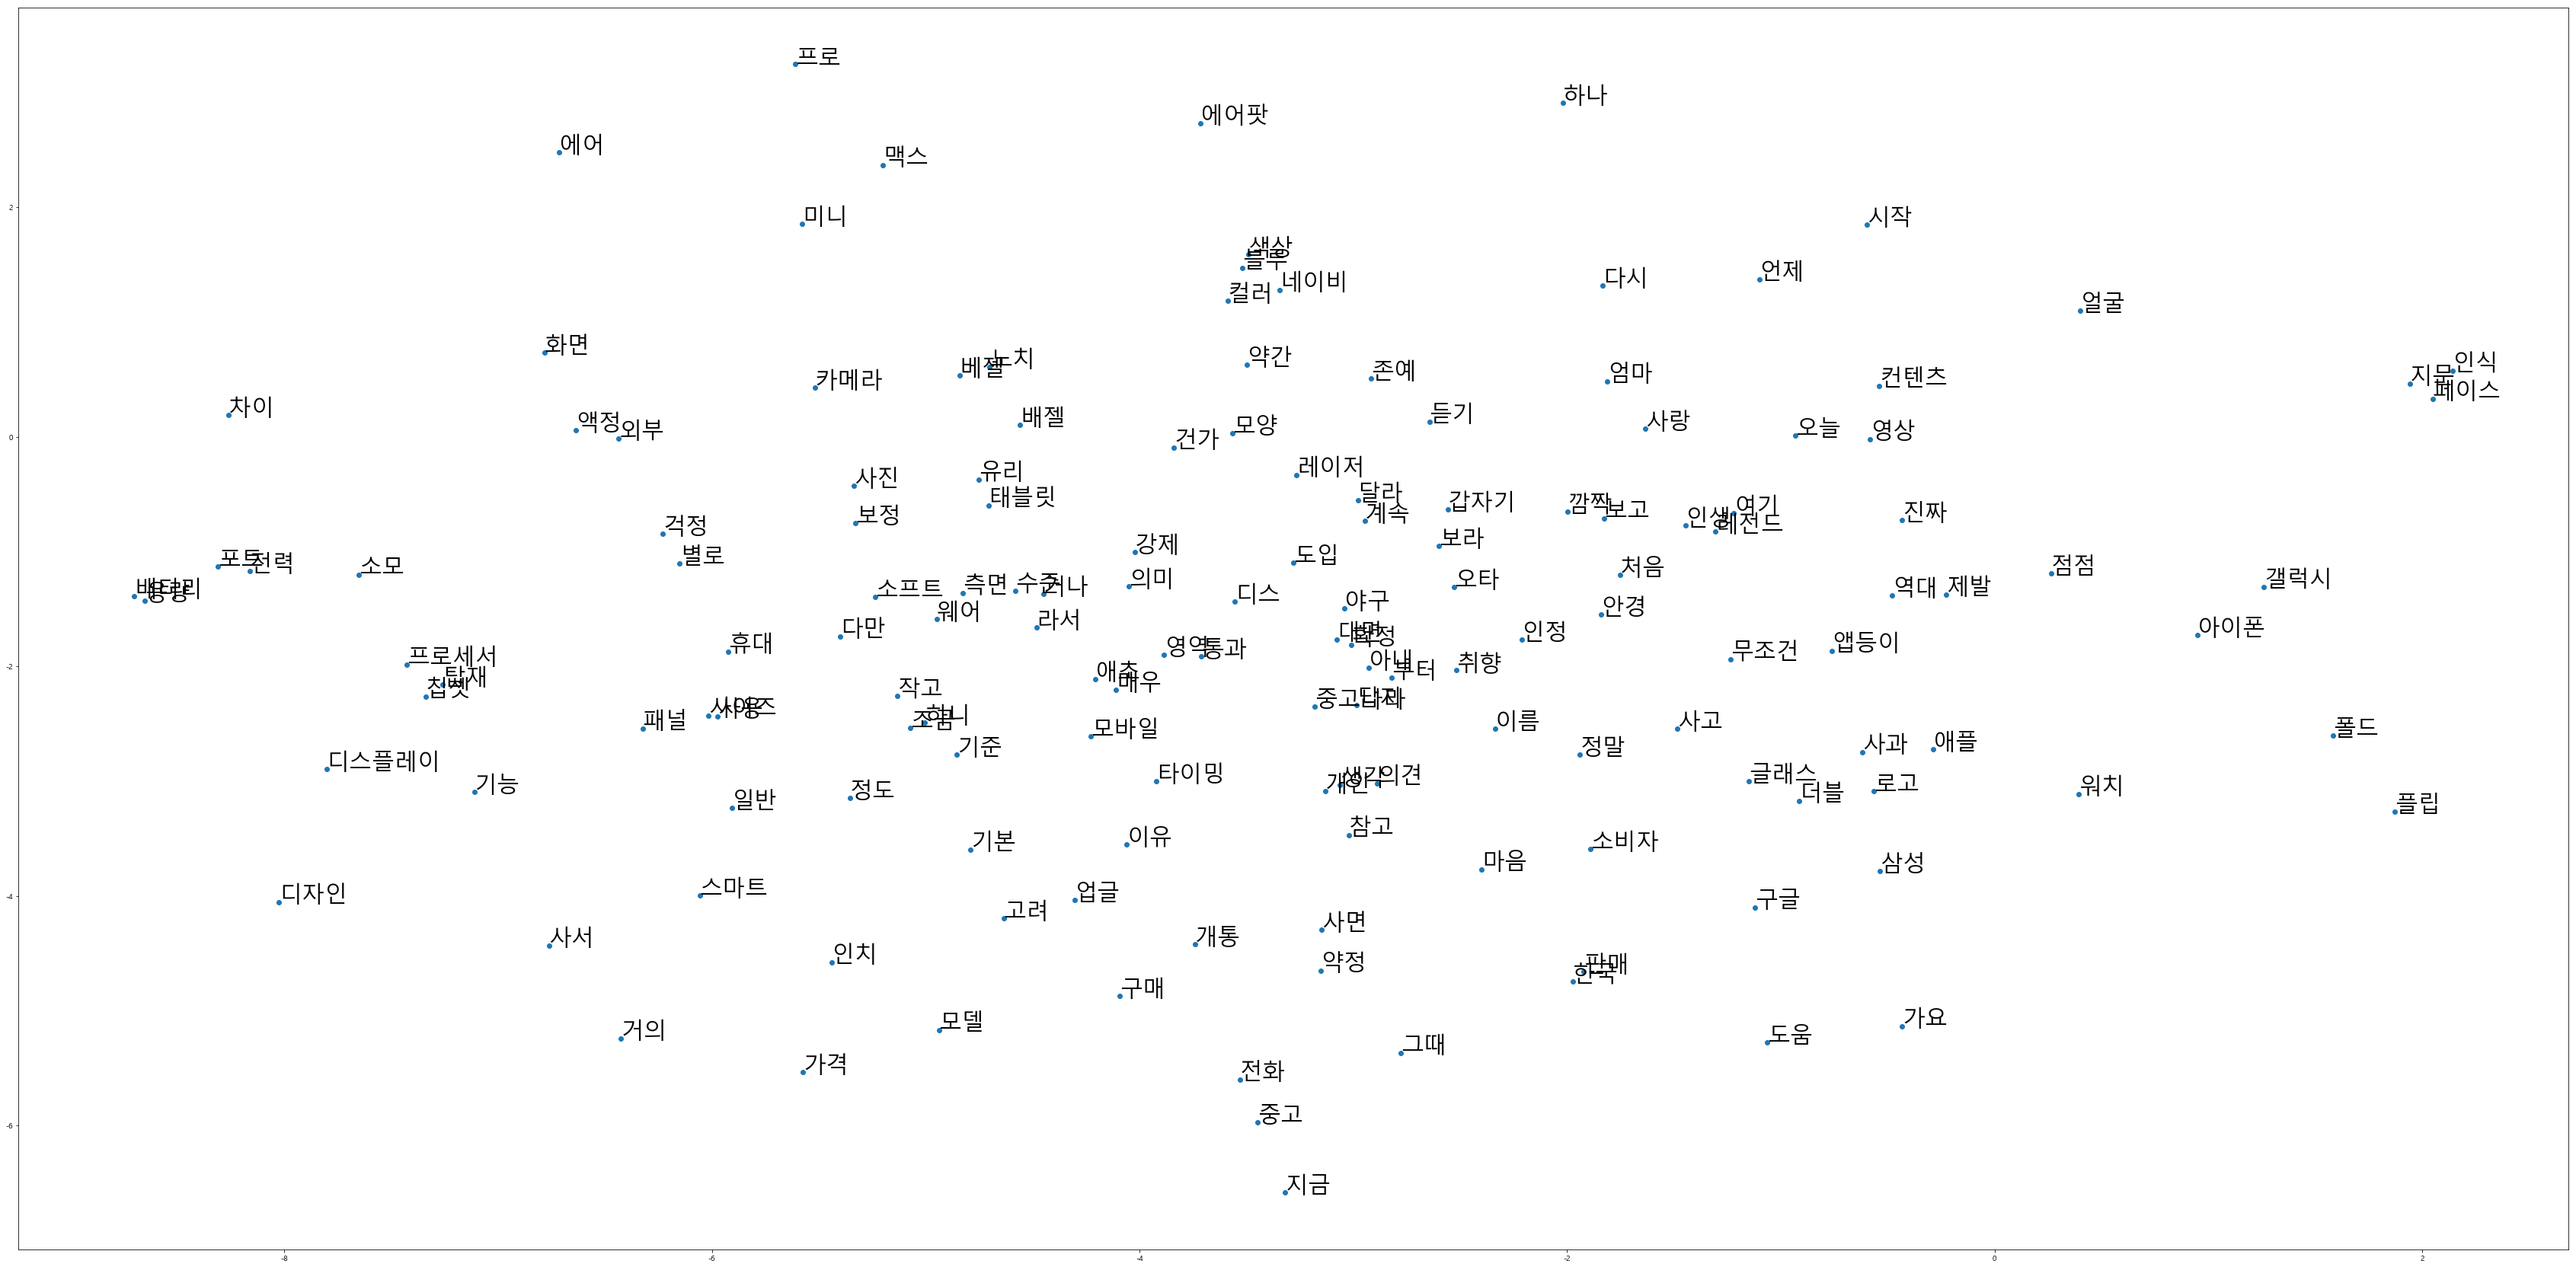

In [107]:
fig = plt.figure()
fig.set_size_inches(60, 30)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()